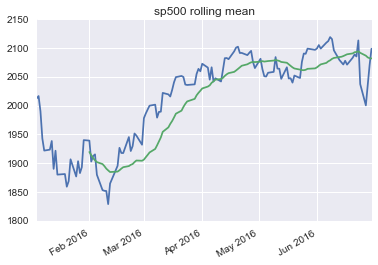

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get input datas
def get_stock_data(symbol):
    # 01-02 Join SPY data
    df=pd.read_csv('yahoo/{}.csv'.format(symbol), index_col='Date', parse_dates=True, 
                   usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'],
                   na_values=['nan'])
    df.dropna()
    return df

stocks={}
symbols=['sp500','GLD', 'AAPL', 'GOOGL', 'FB']
for symbol in symbols:
    stocks[symbol]=get_stock_data(symbol)

# 01-01
# plot
#fb['High'].plot()
#plt.title('Facebook\'s High')

#googl[['Close','Adj Close']].plot()
#plt.title('Google\'s Close & Adj Close')

# 01-02 Create an empty data frame, Join SPY data
start_date='2016-01-01'
end_date='2016-06-30'
dates=pd.date_range(start_date, end_date)
# empty_data_frame=pd.DataFrame(index=dates)
#joined_df=empty_data_frame.join(aapl, how='left')
#joined_df=joined_df.dropna()
#print joined_df

# 01-02 Read in more stocks
close_df=pd.DataFrame(index=dates)
for stock_name in stocks:
    stock=stocks[stock_name]
    temp_df=stock[['Close']].rename(columns={'Close':stock_name})
    close_df=close_df.join(temp_df)
    
close_df=close_df.dropna()
# print close_df.head()

# 01-02 More slicing
#print close_df.ix['2016-01-01':'2016-01-05', ['FB']]

# 01-02 Problems with plotting
# close_df_plot=close_df.plot(title='Close')
# close_df_plot.set_xlabel("Date")
# close_df_plot.set_ylabel("Price")

# 01-02 Normalizing
normalized_close_df = close_df / close_df.ix[0,:]
# normalized_close_df_plot=normalized_close_df.plot(title='Normalized Close')
# normalized_close_df_plot.set_xlabel("Date")
# normalized_close_df_plot.set_ylabel("Normalized Price")

# 01-04 Compute global statistics
# print close_df.max()
# print close_df.mean()
# print close_df.min()

# 01-04 Rolling Statistics
close_df_sp500_rolling_mean_plot=close_df['sp500'].plot(title='sp500 rolling mean', label='sp500')
rm_sp500=close_df['sp500'].rolling(window=20).mean()
rm_sp500.plot(label='Rolling mean', ax=close_df_sp500_rolling_mean_plot)